# **Prepare Data**

## **Import Library**

In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## **Load Data**

In [2]:
# Load Data
path = "../Data Arduino 4 treatment/fixed_formatData.xlsx"
df = pd.read_excel(path)
df

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan
0,151,149.0,106.40,73,0,1
1,151,149.0,109.78,73,0,1
2,149,149.0,106.40,73,0,1
3,149,149.0,130.06,73,0,1
4,149,151.4,106.40,73,0,1
...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4
1437,149,153.8,140.20,64,3,4
1438,147,153.8,113.16,64,3,4
1439,149,153.8,123.30,64,3,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 67.7 KB


In [4]:
def plot_3d_color_space(data, x_col, y_col, z_col, color_col=None, 
                        title="3D Visualization", 
                        axis_labels=None, 
                        marker_size=4,
                        color_scale=None):
    # Salin data agar tidak mengubah asli
    data_plot = data.copy()
    
    # Jika color_col ada dan bukan None, ubah ke tipe kategori
    if color_col:
        data_plot[color_col] = data_plot[color_col].astype('category')

    fig = px.scatter_3d(
        data_plot,
        x=x_col,
        y=y_col,
        z=z_col,
        color=color_col if color_col else None,
        color_continuous_scale=color_scale if color_col and color_scale else None,
        size_max=marker_size,
        title=title,
        labels=axis_labels or {x_col: x_col, y_col: y_col, z_col: z_col}
    )

    # Atur ukuran marker
    fig.update_traces(marker=dict(size=marker_size))

    # Layout dasar
    fig.update_layout(
        scene=dict(
            xaxis_title=axis_labels[0] if axis_labels else x_col,
            yaxis_title=axis_labels[1] if axis_labels else y_col,
            zaxis_title=axis_labels[2] if axis_labels else z_col,
            aspectmode='cube'
        ),
        margin=dict(l=0, r=0, b=0, t=40),
        showlegend=bool(color_col),
        legend_title_text=color_col if color_col else None,
        title_x=0.5,
        legend=dict(
            x=0.9,  # Posisi horizontal legenda (dekat dengan cube)
            y=0.5,  # Posisi vertikal legenda (tengah-tengah cube)
            xanchor="left",  # Titik referensi posisi legenda
            yanchor="middle",
            font=dict(size=10)
        )
    )

    # Jika color_col ada dan ingin legenda kategorikal tanpa colorbar
    if color_col:
        fig.update_layout(
            coloraxis_colorbar=dict(
                lenmode='fraction',
                len=0.01,
                thicknessmode='pixels',
                thickness=0  # Hilangkan colorbar
            )
        )

    fig.show()

In [5]:
plot_3d_color_space(df, 'R', 'G', 'B', color_col='Perlakuan',
                    title="3D Scatter Plot - Ruang RGB",
                    axis_labels=['Red (R)', 'Green (G)', 'Blue (B)'])

## **Ekstraksi Fitur**

### **Normalisasi Kanal RGB**

In [6]:
def normalize_rgb(df):
    # Salin dataframe
    df_norm = df.copy()
    # Normalisasi kolom R, G, dan B
    df_norm['r'] = df_norm['R'] / 255
    df_norm['g'] = df_norm['G'] / 255
    df_norm['b'] = df_norm['B'] / 255

    return df_norm

In [7]:
df_norm= normalize_rgb(df)
df_norm

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255
...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529


In [8]:
plot_3d_color_space(df_norm, 'r', 'g', 'b', color_col='Perlakuan',
                    title="3D Scatter Plot - Ruang RGB",
                    axis_labels=['Red (R)', 'Green (G)', 'Blue (B)'])

### **Perbandingan Kanal**

In [9]:
def calculate_ratios(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_rasio = df.copy()

    # Hitung rasio R/G
    df_rasio['R/Gratio'] = df_rasio['R'] / df_rasio['G']

    # Hitung rasio G/B
    df_rasio['G/Bratio'] = df_rasio['G'] / df_rasio['B']

    return df_rasio

In [10]:
df_rasio = calculate_ratios(df_norm)
df_rasio

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932
...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364


In [11]:
def plot_ratio_scatter(df, treatment_col='Perlakuan'):
    # Pastikan kolom 'Perlakuan' adalah tipe kategori
    df = df.copy()
    df[treatment_col] = df[treatment_col].astype('category')

    # Buat scatter plot
    plt.figure(figsize=(18, 12))
    scatter_plot = sns.scatterplot(
        data=df,
        x='R/Gratio',
        y='G/Bratio',
        hue=treatment_col,     # Warna berdasarkan kategori/perlakuan
        style=treatment_col,   # Marker style berdasarkan kategori
        palette='Set2',        # Palet warna
        s=100,                 # Ukuran marker
        alpha=0.7              # Transparansi marker
    )

    # Tambahkan label, judul, dan legenda
    scatter_plot.set_title('Scatter Plot Rasio Warna: R/G vs G/B', fontsize=14)
    scatter_plot.set_xlabel('R/G Ratio', fontsize=12)
    scatter_plot.set_ylabel('G/B Ratio', fontsize=12)
    scatter_plot.legend(title=treatment_col, title_fontsize=10, fontsize=9, loc='best')

    # Atur grid untuk kemudahan pembacaan
    plt.grid(visible=True, linestyle='--', alpha=0.5)

    # Tampilkan plot
    plt.tight_layout()
    plt.show()

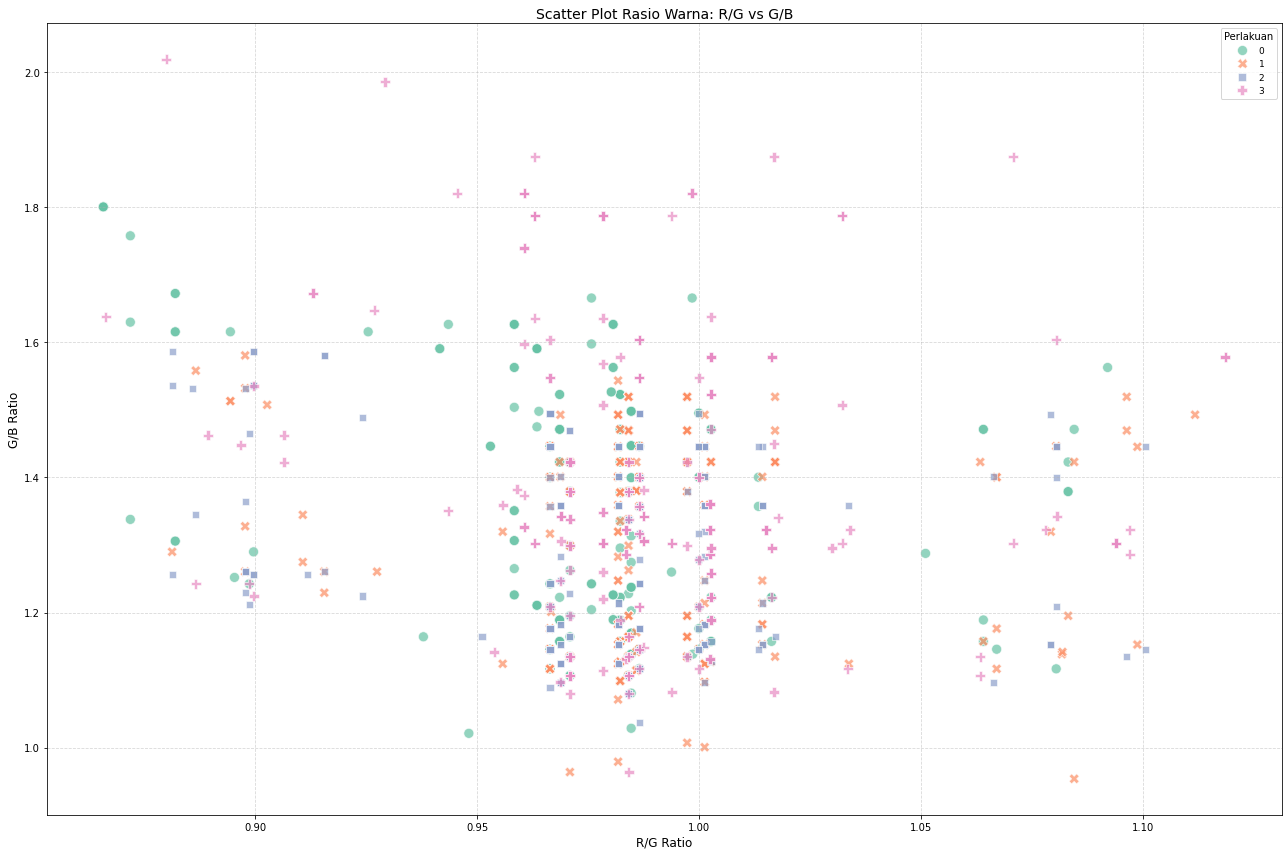

In [12]:
# Plot dengan Plotly
plot_ratio_scatter(df_rasio, treatment_col='Perlakuan')

### **Mencari Nilai HSV**

In [13]:
def rgb_to_hsv(df):
    # Salin dataframe
    df_hsv = df.copy()
    
    # Ekstrak kolom r, g, dan b
    r = df_hsv['r']
    g = df_hsv['g']
    b = df_hsv['b']

    # Hitung nilai maksimum (V) dan minimum (m)
    cmax = np.maximum.reduce([r, g, b])
    cmin = np.minimum.reduce([r, g, b])
    delta = cmax - cmin

    # Hitung Hue (H)
    def calculate_hue():
        hue = np.zeros_like(delta)  # Default hue adalah 0
        mask_r_max = (cmax == r) & (delta != 0)
        mask_g_max = (cmax == g) & (delta != 0)
        mask_b_max = (cmax == b) & (delta != 0)

        # Rumus untuk hue jika R adalah maksimum
        hue[mask_r_max] = (60 * ((g[mask_r_max] - b[mask_r_max]) / delta[mask_r_max]) + 360) % 360

        # Rumus untuk hue jika G adalah maksimum
        hue[mask_g_max] = (60 * ((b[mask_g_max] - r[mask_g_max]) / delta[mask_g_max]) + 120) % 360

        # Rumus untuk hue jika B adalah maksimum
        hue[mask_b_max] = (60 * ((r[mask_b_max] - g[mask_b_max]) / delta[mask_b_max]) + 240) % 360

        return hue

    h = calculate_hue()

    # Hitung Saturation (S)
    s = np.where(cmax != 0, delta / cmax, 0)

    # Value (V) adalah nilai maksimum
    v = cmax

    # Tambahkan kolom h, s, dan v ke DataFrame
    df_hsv['H'] = h
    df_hsv['S'] = s
    df_hsv['V'] = v

    return df_hsv

In [14]:
df_hsv = rgb_to_hsv(df_rasio)
df_hsv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137


In [15]:
plot_3d_color_space(df_hsv, 'H', 'S', 'V', color_col='Perlakuan',
                    title="3D Scatter Plot - Ruang HSV",
                    axis_labels=['Hue', 'Saturation', 'Value'])

### **Mencari Nilai Lab**

#### **Hitung Manual**

In [16]:
def rgb_to_lab(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_lab = df.copy()

    # Normalisasi RGB ke rentang [0, 1]
    r = df_lab['r']
    g = df_lab['g']
    b = df_lab['b']

    # Koreksi gamma untuk nilai RGB
    def gamma_correction(c):
        return np.where(c > 0.04045, ((c + 0.055) / 1.055) ** 2.4, c / 12.92)

    # Terapkan koreksi gamma
    r_linear = gamma_correction(r)
    g_linear = gamma_correction(g)
    b_linear = gamma_correction(b)

    # Transformasi RGB ke XYZ menggunakan matriks standar
    X = 0.4124564 * r_linear + 0.3575761 * g_linear + 0.1804375 * b_linear
    Y = 0.2126729 * r_linear + 0.7151522 * g_linear + 0.0721750 * b_linear
    Z = 0.0193339 * r_linear + 0.1191920 * g_linear + 0.9503041 * b_linear

    # Nilai referensi untuk XYZ (D65/2° standard illuminant)
    Xn, Yn, Zn = 0.95047, 1.0, 1.08883

    # Fungsi untuk menghitung f(t)
    def f(t):
        return np.where(t > 0.008856, t ** (1/3), 7.787 * t + 16/116)

    # Hitung L, a, dan b
    L = 116 * f(Y / Yn) - 16
    a = 500 * (f(X / Xn) - f(Y / Yn))
    b = 200 * (f(Y / Yn) - f(Z / Zn))

    # Tambahkan kolom L, a, dan b ke DataFrame
    df_lab['cL'] = L
    df_lab['ca'] = a
    df_lab['cb'] = b

    return df_lab

In [17]:
df_lab=rgb_to_lab(df_hsv)
df_lab

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R/Gratio,G/Bratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.890564,-6.299734,22.830546
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,60.953899,-5.827671,21.044019
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.723155,-7.112026,22.577013
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.218617,-3.447379,10.020923
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.395413,-8.411532,23.476470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.883257,-4.341136,7.130325
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.788701,-4.301695,6.543102
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,62.035710,-9.534773,20.581252
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.399884,-7.187258,15.471242


In [18]:
plot_3d_color_space(df_lab, 'cL', 'ca', 'cb', color_col='Perlakuan',
                    title="3D Scatter Plot - Ruang CIELAB",
                    axis_labels=['Lightness (L*)', 'Green-Red (a*)', 'Blue-Yellow (b*)'])

In [19]:
kolom_distribusi = ['R', 'G', 'B', 'r', 'g', 'b', 
                    'H', 'S', 'V', 'cL', 'ca', 'cb']

In [20]:
def plot_kde_all_features_flat(df, kolom_distribusi):
    # Cek apakah semua kolom tersedia
    missing_cols = [col for col in kolom_distribusi if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Kolom berikut tidak ditemukan di DataFrame: {missing_cols}")
    
    # Hitung jumlah baris dan kolom subplot
    n_cols = len(kolom_distribusi)
    ncols = 3
    nrows = (n_cols + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
    axes = axes.flatten()

    # Loop setiap fitur dan buat KDE plot
    for i, col in enumerate(kolom_distribusi):
        sns.kdeplot(
            df[col],
            ax=axes[i],
            fill=True,
            color='skyblue',
            alpha=0.6,
            linewidth=2
        )
        axes[i].set_title(f'Distribusi {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Density')
        axes[i].grid(True, linestyle='--', alpha=0.5)

    # Hapus subplot kosong jika ada
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

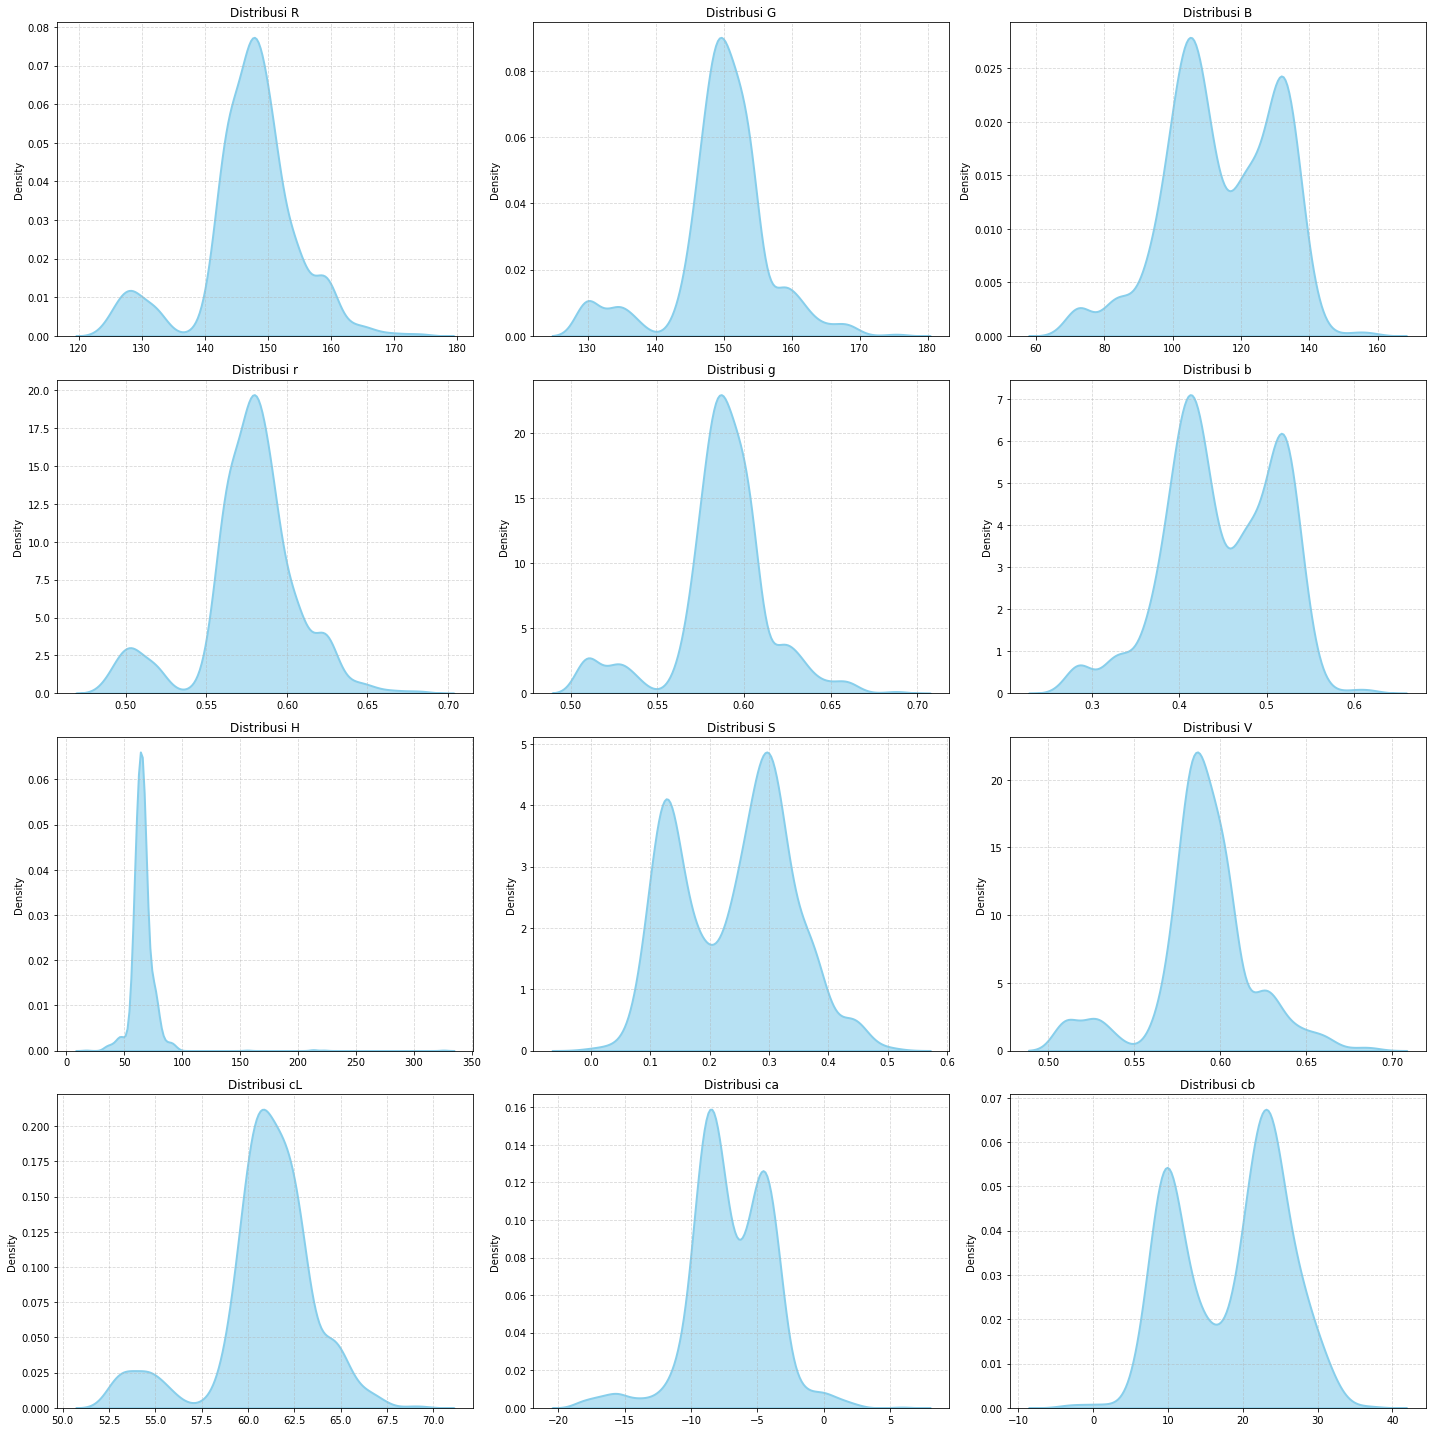

In [21]:
plot_kde_all_features_flat(df_lab, kolom_distribusi)

In [22]:
def plot_combined_feature_distribution(df, kolom_distribusi, perlakuan_col='Perlakuan', ncols=3):
    n_features = len(kolom_distribusi)
    nrows = (n_features + ncols - 1) // ncols  # Hitung jumlah baris yang dibutuhkan
    
    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(20, 6 * nrows),  # Sesuaikan ukuran grid
        sharex=False,
        sharey=False
    )
    
    axes = axes.flatten()  # Memastikan axes berbentuk 1D untuk iterasi
    
    for i, feature in enumerate(kolom_distribusi):
        sns.kdeplot(
            data=df,
            x=feature,
            hue=perlakuan_col,
            fill=True,
            alpha=0.6,
            ax=axes[i],
            palette="Set2"
        )
        axes[i].set_title(f'Distribusi {feature} Berdasarkan {perlakuan_col}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
    
    # Hapus subplot kosong jika ada
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Menghapus subplot kosong
    
    plt.tight_layout()
    plt.show()

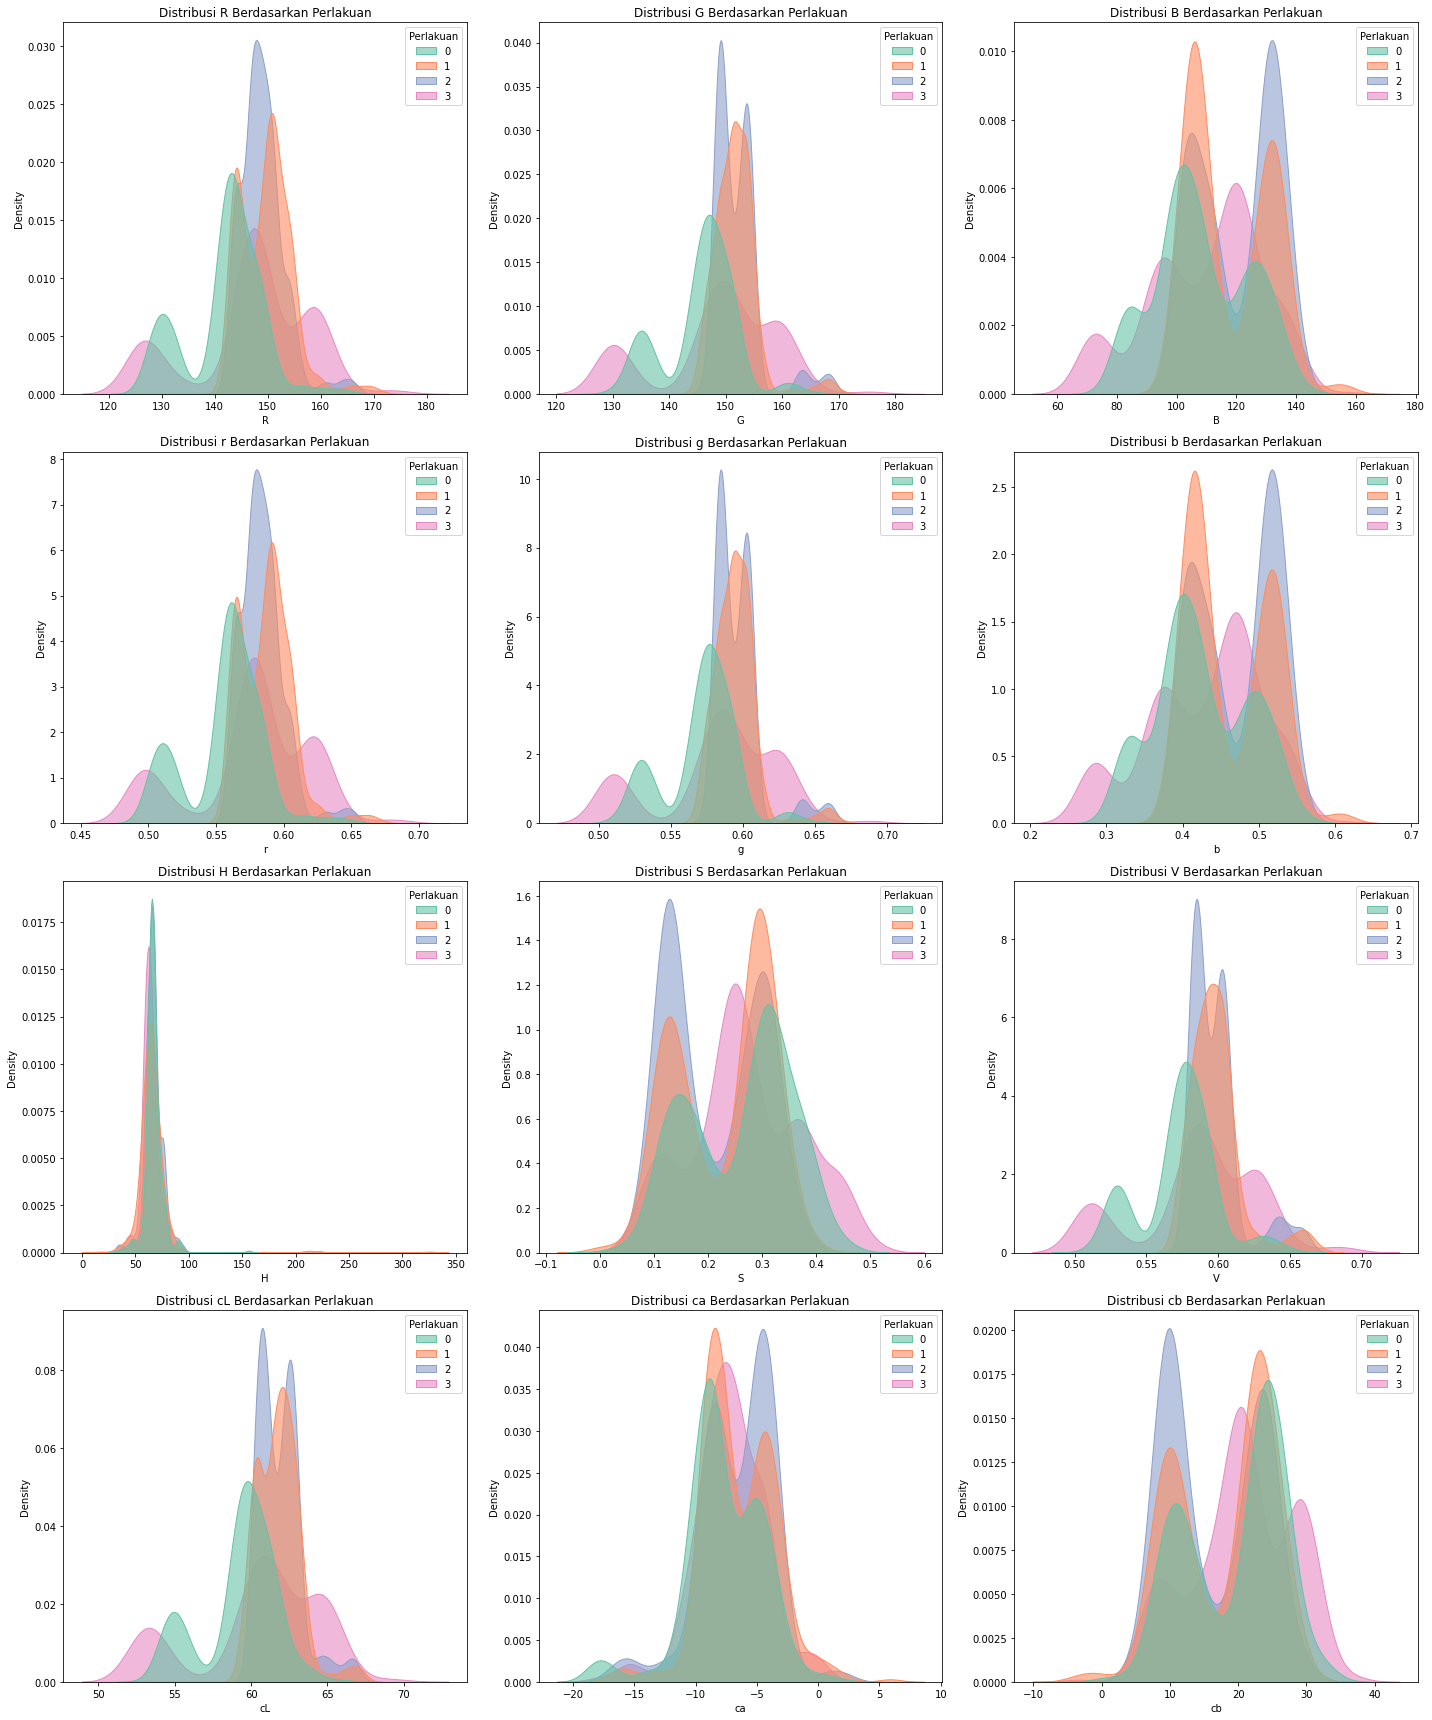

In [23]:
plot_combined_feature_distribution(df_lab, kolom_distribusi, perlakuan_col='Perlakuan')

## **Visualisasi Performa Model**